In [1]:
import os
import numpy as np
from DataLoader3 import load_images_from_selected_classes

# Define the classes you want to sample images from
selected_classes = ['Apple Braeburn', 'Banana', 'Lemon', 'Limes']

# Path to the folder containing the images
base_folder_path = "C:/Users/aemsh/Desktop/DATA4380/ComputerVision/fruits-360_dataset/fruits-360/Training"

# Load and resize images from selected classes
loaded_images_dict = load_images_from_selected_classes(selected_classes, base_folder_path)

# Convert the loaded images per class into an array list
images_array_dict = {}
for class_name, images in loaded_images_dict.items():
    images_array_dict[class_name] = np.array(images)

# Now you can access any desired image from a desired class
desired_class_name = 'Banana'
desired_image_index = 9  # Index starts from 0, so 9 means the 10th image
desired_image = images_array_dict[desired_class_name][desired_image_index]

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Concatenate all images and labels into arrays
X = []
y = []
for class_name, images_array in images_array_dict.items():
    X.extend(images_array)
    y.extend([class_name] * len(images_array))

X = np.array(X)
y = np.array(y)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(X_train.shape[1:])),  # Flatten the input images
    Dense(256, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10



8/8 [==============================] - 8s 623ms/step - loss: 54535.8438 - accuracy: 0.2539 - val_loss: 15889.7305 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 3s 426ms/step - loss: 6863.1475 - accuracy: 0.5156 - val_loss: 3064.6863 - val_accuracy: 0.6875
Epoch 3/10
8/8 [==============================] - 3s 400ms/step - loss: 2256.5173 - accuracy: 0.6641 - val_loss: 2066.3210 - val_accuracy: 0.6719
Epoch 4/10
8/8 [==============================] - 3s 405ms/step - loss: 1237.4514 - accuracy: 0.7227 - val_loss: 533.7514 - val_accuracy: 0.7969
Epoch 5/10
8/8 [==============================] - 3s 417ms/step - loss: 299.9740 - accuracy: 0.8906 - val_loss: 305.3879 - val_accuracy: 0.8750
Epoch 6/10
8/8 [==============================] - 3s 412ms/step - loss: 169.7935 - accuracy: 0.9492 - val_loss: 13.4319 - val_accuracy: 0.9688
Epoch 7/10
8/8 [==============================] - 3s 418ms/step - loss: 24.9376 - accuracy: 0.9805 - val_loss: 4.8747 - val_accuracy: 0.984

Generating augmented images for class: Apple Braeburn
Generating augmented images for class: Banana
Generating augmented images for class: Lemon
Generating augmented images for class: Limes


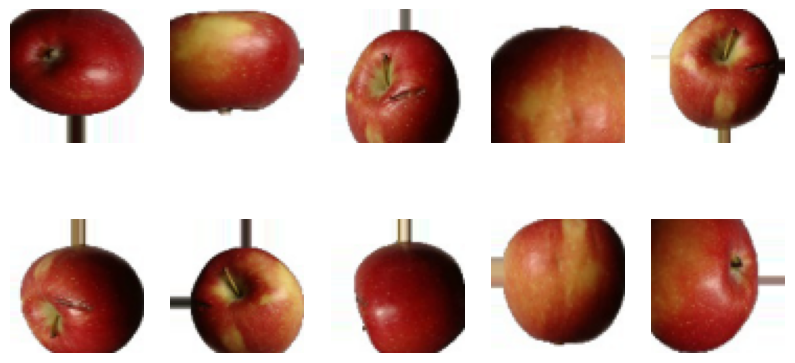

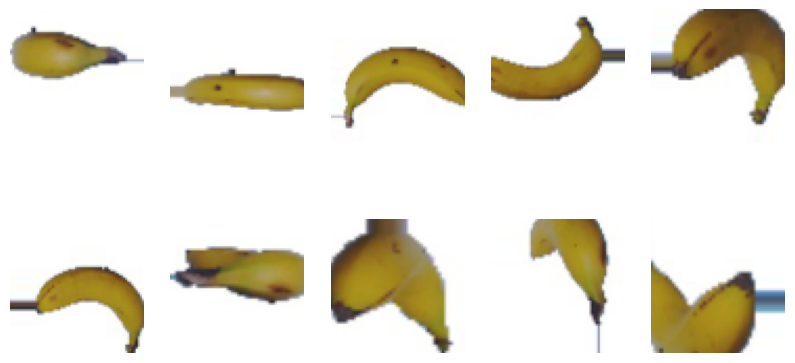

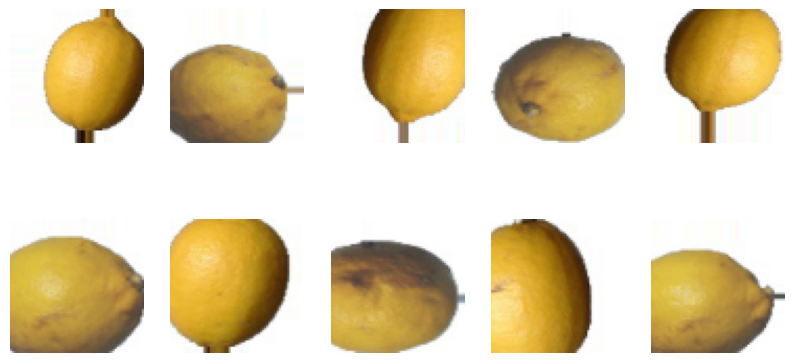

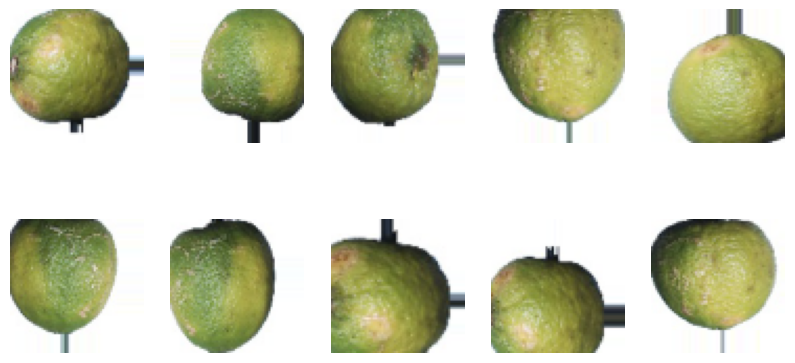

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialize the ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
)

# Generate augmented images for each class
for class_name, images in images_array_dict.items():
    print(f"Generating augmented images for class: {class_name}")
    
    # Reshape images to rank 4 tensor
    images = images.reshape(images.shape[0], images.shape[1], images.shape[2], 3)
    
    # Initialize generator for this class
    generator = datagen.flow(images, batch_size=1, shuffle=False)
    
    # Initialize subplot
    plt.figure(figsize=(10, 5))
    
    # Generate augmented images
    num_augmented_images = 0
    for batch in generator:
        augmented_image = batch[0]
        # Resize the augmented image
        resized_image = cv2.resize(augmented_image.astype(np.uint8), (64, 64))  # Change the size as needed
        # Plot the augmented image
        plt.subplot(2, 5, num_augmented_images + 1)
        plt.imshow(resized_image)
        plt.axis('off')
        num_augmented_images += 1
        if num_augmented_images >= 10:  # Generate 10 augmented images per class
            break

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Concatenate all images and labels into arrays
X = []
y = []
for class_name, images_array in images_array_dict.items():
    X.extend(images_array)
    y.extend([class_name] * len(images_array))

X = np.array(X)
y = np.array(y)

# Encode class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert class labels to one-hot encoding
y_onehot = to_categorical(y_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(X_train.shape[1:])),  # Flatten the input images
    Dense(256, activation='relu'),
    Dense(len(selected_classes), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
8/8 [==============================] - 5s 512ms/step - loss: 53188.2656 - accuracy: 0.2930 - val_loss: 16780.1934 - val_accuracy: 0.3594
Epoch 2/10
8/8 [==============================] - 4s 451ms/step - loss: 12453.7080 - accuracy: 0.5117 - val_loss: 4045.9849 - val_accuracy: 0.6562
Epoch 3/10
8/8 [==============================] - 3s 430ms/step - loss: 2454.9243 - accuracy: 0.7500 - val_loss: 510.1021 - val_accuracy: 0.9062
Epoch 4/10
8/8 [==============================] - 4s 446ms/step - loss: 254.2224 - accuracy: 0.9180 - val_loss: 77.6260 - val_accuracy: 0.9688
Epoch 5/10
8/8 [==============================] - 3s 432ms/step - loss: 239.7113 - accuracy: 0.9336 - val_loss: 229.4725 - val_accuracy: 0.8906
Epoch 6/10
8/8 [==============================] - 4s 437ms/step - loss: 93.7520 - accuracy: 0.9531 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 3s 433ms/step - loss: 13.8653 - accuracy: 0.9844 - val_loss: 0.0000e+00 - val_

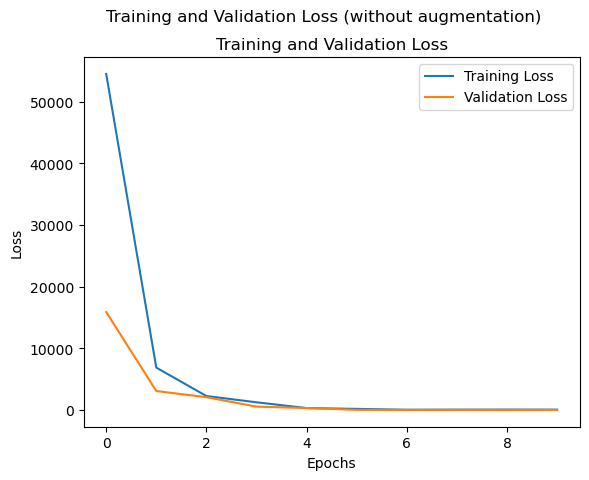

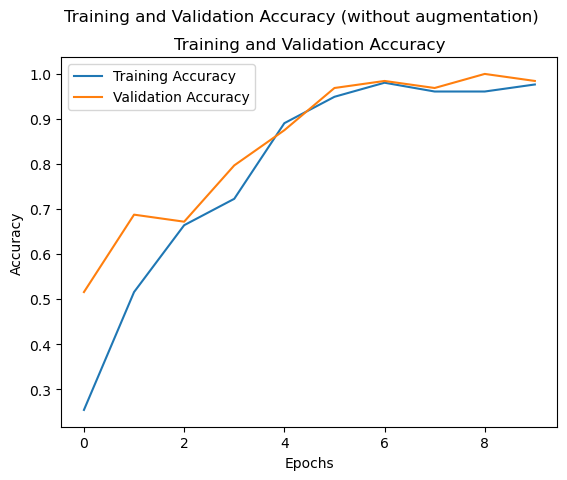

In [3]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.suptitle('Training and Validation Loss (without augmentation)')  # Add supertitle
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.suptitle('Training and Validation Accuracy (without augmentation)')  # Add supertitle
plt.show()


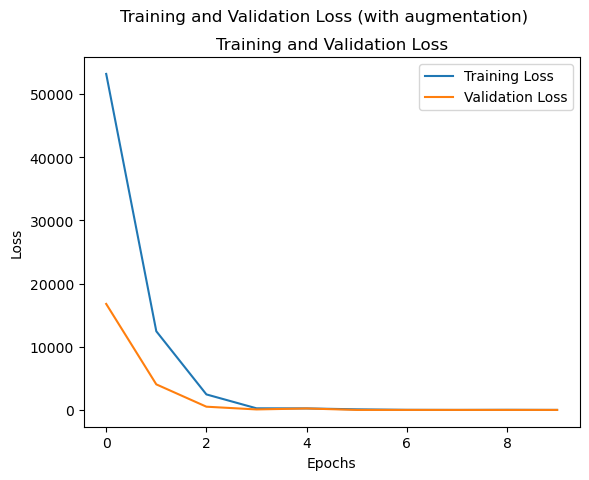

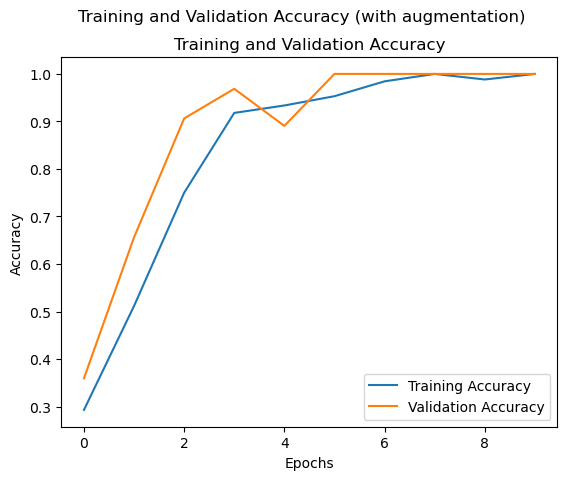

In [6]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.suptitle('Training and Validation Loss (with augmentation)')  # Add supertitle
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.suptitle('Training and Validation Accuracy (with augmentation)')  # Add supertitle
plt.show()
